# 1.Employee Resignation Predictions

> I will make a model that allows us to predict which employees are more likely to leave the company.

> Knowing that we will be able to find out the most critical departments (with the largest number of employees who resign), how much economic impact the resignation of employees has on the company, what the most common variables are in employees who finally decide to resign, etc.





In [1]:
# libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')

#Abro la base del Drive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Base de Datos 1/AbandonoEmpleados.csv",  sep = ';',  index_col= 'id', na_values='#N/D') 

Mounted at /content/drive


# 2.Knowing the Df

In [3]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

We can see that there are a total of 1470 observations and   31 variables, some of which have missing values. 

In [7]:
#Missings
#=====================================================

df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

In [8]:
# % of missings
anos_en_puesto_null = df.anos_en_puesto.isnull().sum()/len(df.anos_en_puesto)*100
conciliacion_null = df.conciliacion.isnull().sum()/len(df.conciliacion)*100

print("% of anos_en_puesto_null =","{:.2f}".format(anos_en_puesto_null), "%")
print("% of conciliacion_null =","{:.2f}".format(conciliacion_null), "%")


% of anos_en_puesto_null = 84.22 %
% of conciliacion_null = 68.78 %


# Conclusions: 

1. Variables **anos_en_puesto** and **conciliacion**; have more than 65% of missings --> they have to be eliminated

2. Variables **sexo, educacion, satisfaccion_trabajo** and **implicacion**; will be analyzed to see what treatment apply 

In [9]:
# Elimination of variables anos_en_puesto and conciliacion
#=================================================================

df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


# EDA

In [10]:
# ANALYSIS CATEGORICAL VARIABLES
#=======================================================================

df.describe(include = object).T 

,count,unique,top,freq
abandono,1470,2,No,1233
viajes,1470,3,Travel_Rarely,1043
departamento,1470,3,Research & Development,961
educacion,1369,4,Universitaria,814
carrera,1470,6,Life Sciences,606
satisfaccion_entorno,1470,4,Alta,453
implicacion,1452,4,Alta,857
puesto,1470,9,Sales Executive,326
satisfaccion_trabajo,1394,4,Alta,828
estado_civil,1470,3,Married,673


In [13]:
def graficos_eda_categoricos(cat):
    
    #calcull del número de filas que se necesitan
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #definir el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #aplanar para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

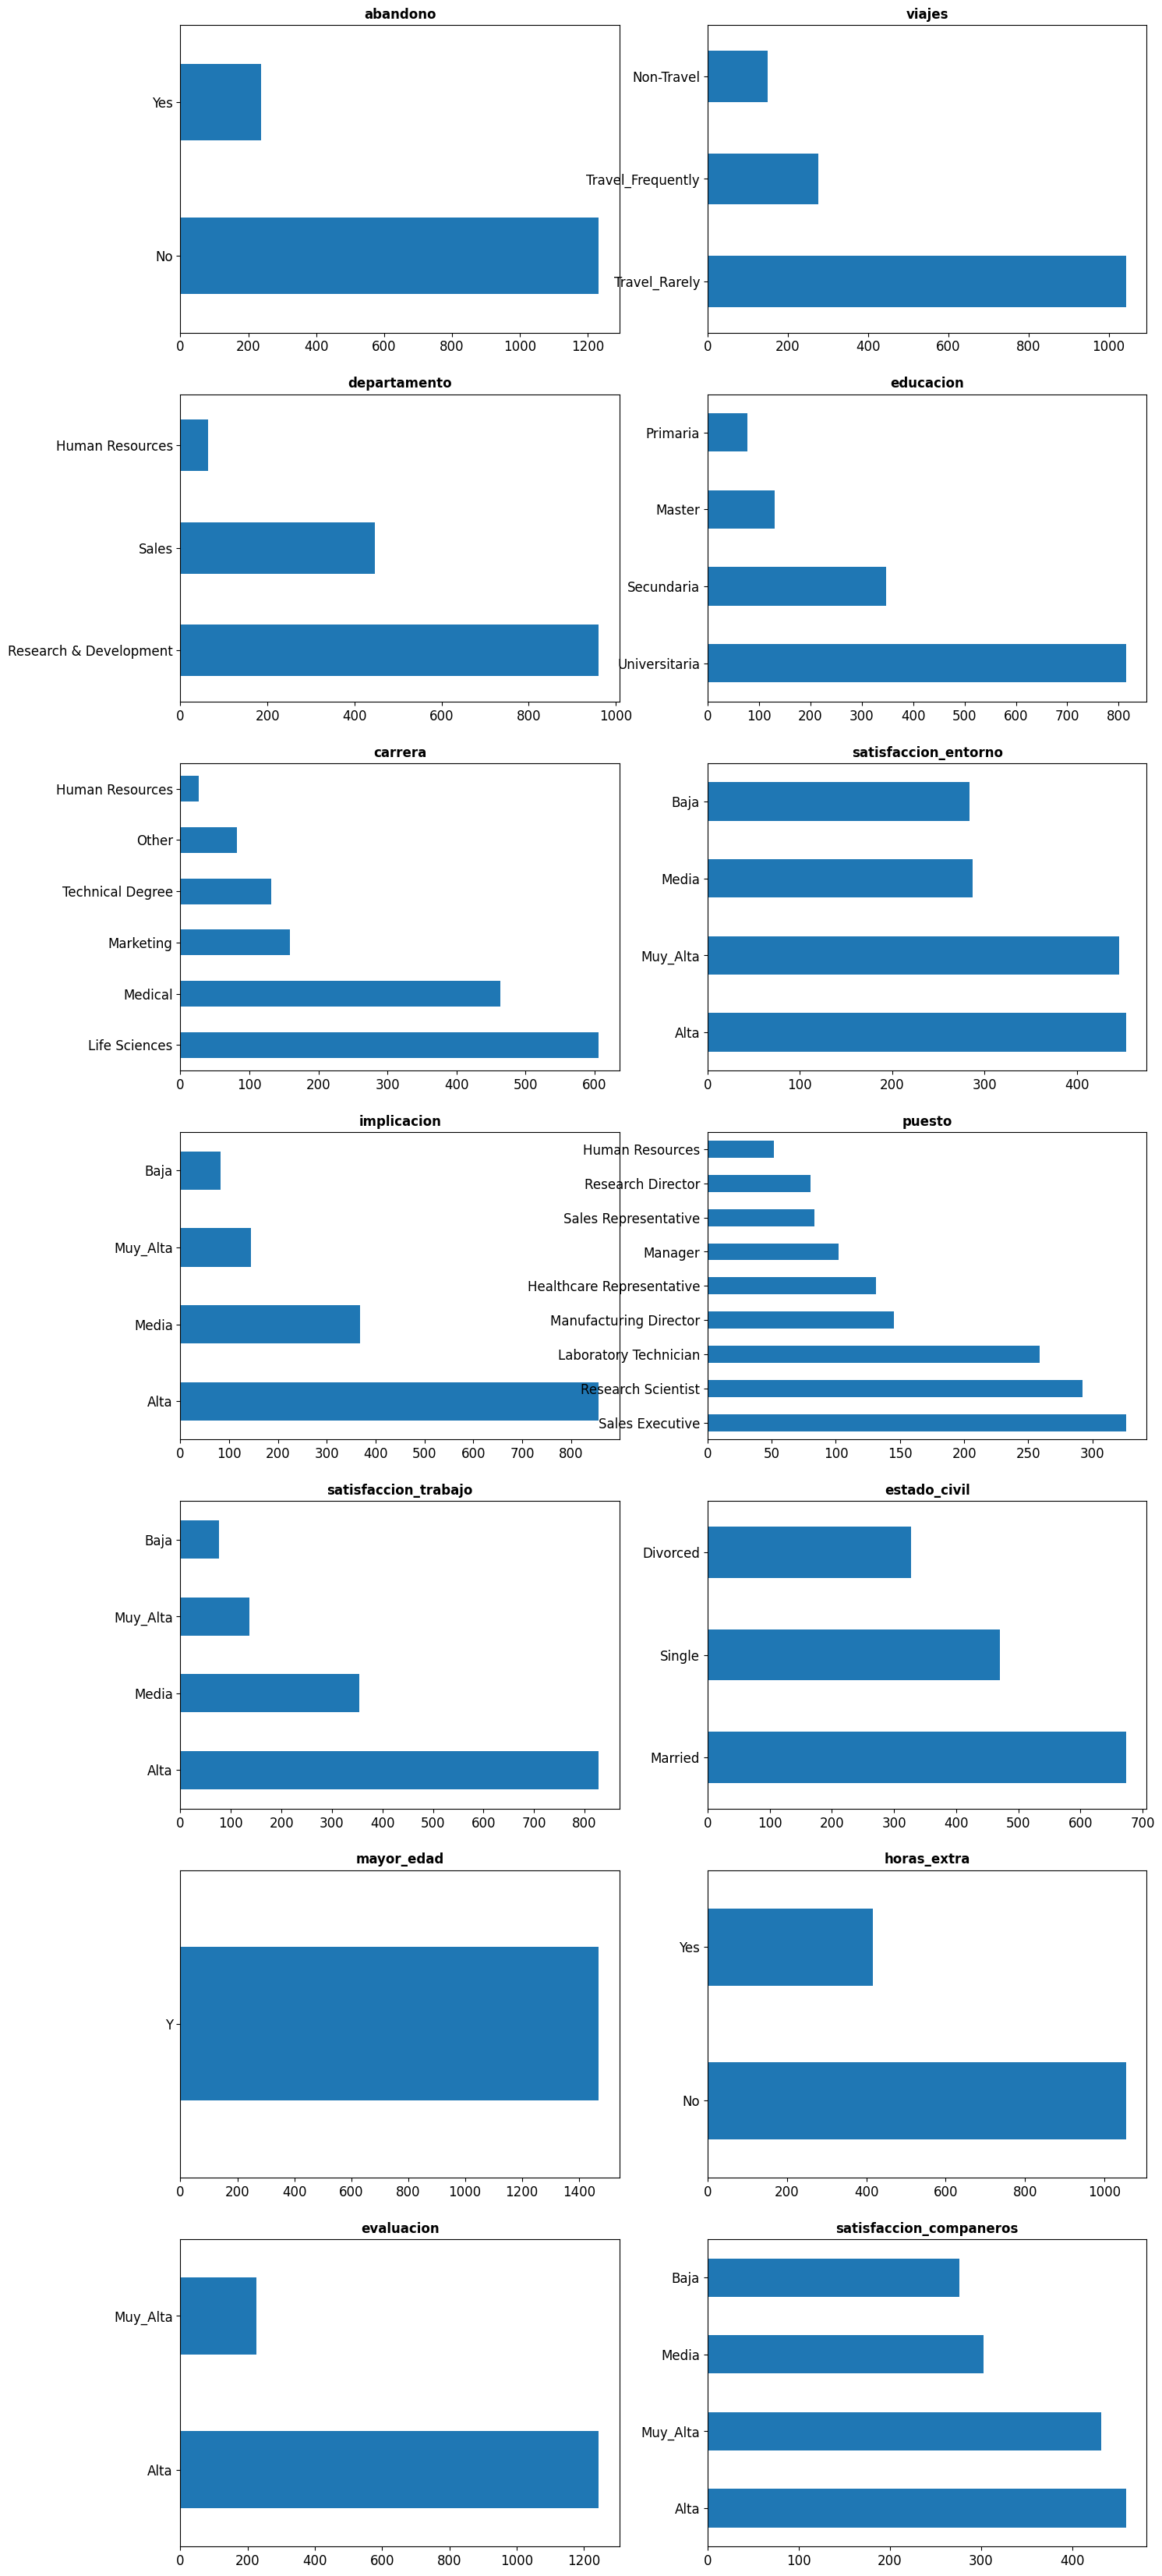

In [14]:
graficos_eda_categoricos(df.select_dtypes('O'))

# Conclusions:

* mayor_edad has only one value --> remove it

Regarding the pending imputations for categorical variables:

* educacion: impute with 'Universitaria'.
* satisfaccion_trabajo: impute with 'Alta'.
* implicacion: impute with 'Alta'.

In [15]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

In [16]:
# ANALYSIS NUMERICAL VARIABLES
df.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
edad,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0


# Conclusions:

* Empleados has only one value --> remove it.

Sexo has 4 values --> remove it.

* Horas quincena has only one value --> remove it.
* Regarding the pending imputations for numerical variables (missings), only Sexo is missing, but since it will be remove it, there is no need to impute anything.

In [17]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


#  3. INSIGHTS

What is the *leave* rate?

In [18]:
df.abandono.value_counts(normalize = True) * 100 #normaliza los resultados para que estén en un rango de 0 a 1 y luego los multiplica por 100 para obtener el % de cada valor único en la columna abandono

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

**Is there an employee profile who leaves the company?**

In [19]:
#castear abandono
df['abandono'] = df.abandono.map({'No':0, 'Yes':1}) #map reemplaza los valores originales de la col

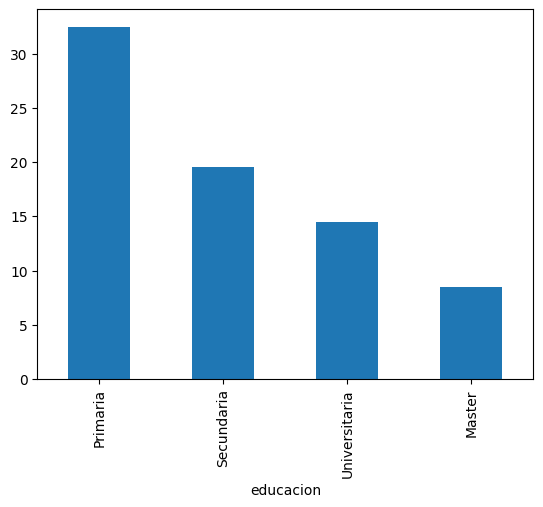

In [20]:
# Analysis: educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

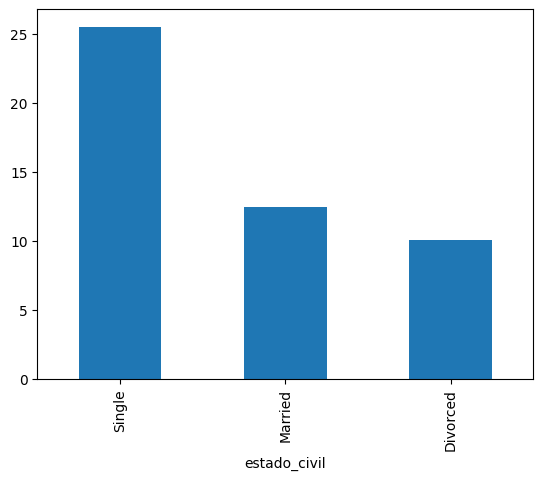

In [21]:
# Analysis: estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

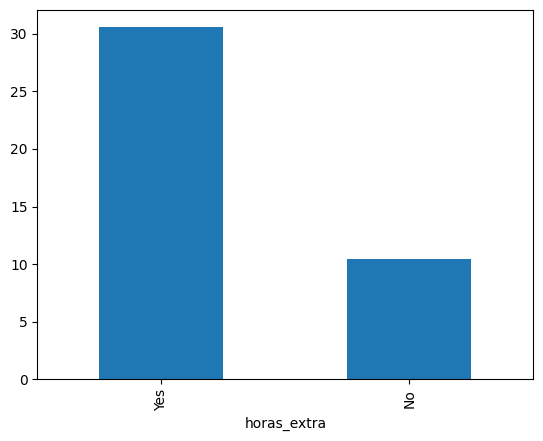

In [22]:
# Analysis: horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

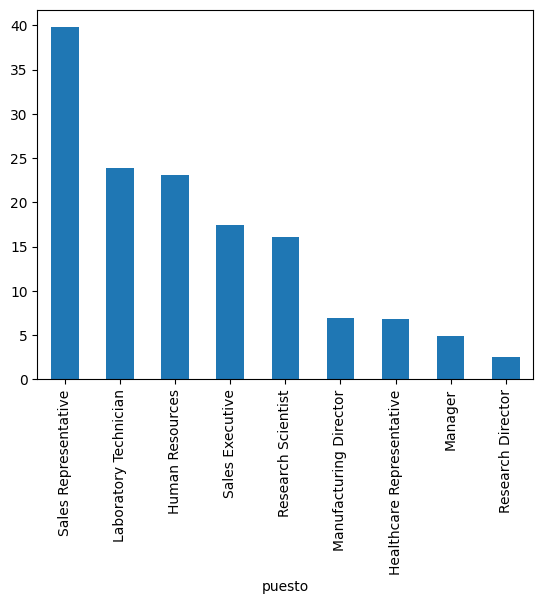

In [23]:
# Analysis: puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

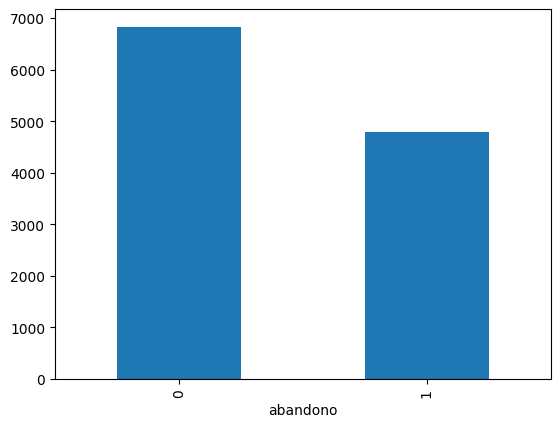

In [24]:
#Analysis: salario
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

# Conclusions:

The average profile of an employee who leaves the company is:

* Low level of education
* Single
* Works in sales
* Low salary
* High workload of overtime hours

**What is the economic impact of this problem?** 

According to the study "Cost of Turnover" by the Center for American Progress:

* The cost of employee turnover for those earning less than 30,000 is 16.1% of their salary.
* The cost of employee turnover for those earning between 30,000-50,000 is 19.7% of their salary.
* The cost of employee turnover for those earning between 50,000-75,000 is 20.4% of their salary.
* The cost of employee turnover for those earning more than 75,000 is 21% of their salary.

With that information now it's necessary to know the annual salary of the employees

In [25]:
# Creation of variable salario_ano of the employee

df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)  #lambda x: x*12 is used to multiply each value in the salario_mes column by 12
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [26]:
# Calculating the economic impact of each employee leaving the company

#Conditions
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Results
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Creation new column
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999) #Si un empleado no cumple con ninguna de las condiciones se le asigna -999.

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


**What has been the cost of this problem in the last year?**

In [27]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

**How much does it cost when employees are not motivated?**

In [28]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

**How much money can we save by better engaging and retaining the employees?**

In [29]:
print(f"Reducing employee leave by 10% would save {int(coste_total * 0.1)}$ per year.")

print(f"Reducing employee leave by 20% would save {int(coste_total * 0.2)}$ per year.")

print(f"Reducing employee leave by 30% would save {int(coste_total * 0.3)}$ per year.")

Reducing employee leave by 10% would save 271900$ per year.
Reducing employee leave by 20% would save 543801$ per year.
Reducing employee leave by 30% would save 815701$ per year.


Knowing that sales representatives are the position that leaves the most, would it make sense to make a specific plan for them? 

What would be the cost saved if the turnover is reduced by 30%?



In [30]:
#Calculation of the % of sales representatives who left last year
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado


0.39759036144578314

In [31]:
#Calculating how many of those employees will leave this year
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

In [32]:
# Regarding them, how many can be retained (assumed 30%) and how much money could it represent?

retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'We can retain {retenemos}  sales representatives and this would mean saving {ahorramos}$.')

We can retain 5  sales representatives and this would mean saving 37447.22424578312$.


# 4. MACHINE LEARNING

In [33]:
df_ml = df.copy()

In [34]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

**Data preparation for modeling**

Transform all categorical variables into numerical ones

In [35]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Final Df**

In [37]:
# Select the numerical variables in order to merge them with the cat_hoe variables
num = df.select_dtypes('number').reset_index(drop = True)

In [38]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


# Modeling

In [39]:
# Separation of predictors and target
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

In [40]:
#Split train and test
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

In [41]:
#Model training (train)
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

**Prediction and validation on test set**

In [42]:
# Prediction
pred = ac.predict_proba(test_x)[:, 1]  # solo en la probabilidad p 1 [:,1]
pred[:20] #imprimir solo los primeros 20 

array([0.05088063, 0.05088063, 0.325     , 0.34375   , 0.09774436,
       0.05088063, 0.05088063, 0.05088063, 0.05088063, 0.325     ,
       0.09774436, 0.05088063, 0.05088063, 0.15131579, 0.66666667,
       0.15131579, 0.05088063, 0.05088063, 0.325     , 0.05088063])

In [43]:
# Evaluation
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)  #evaluar la capacidad predictiva de un modelo de clasificación binaria 

0.6949942900647126

# Decision Tree

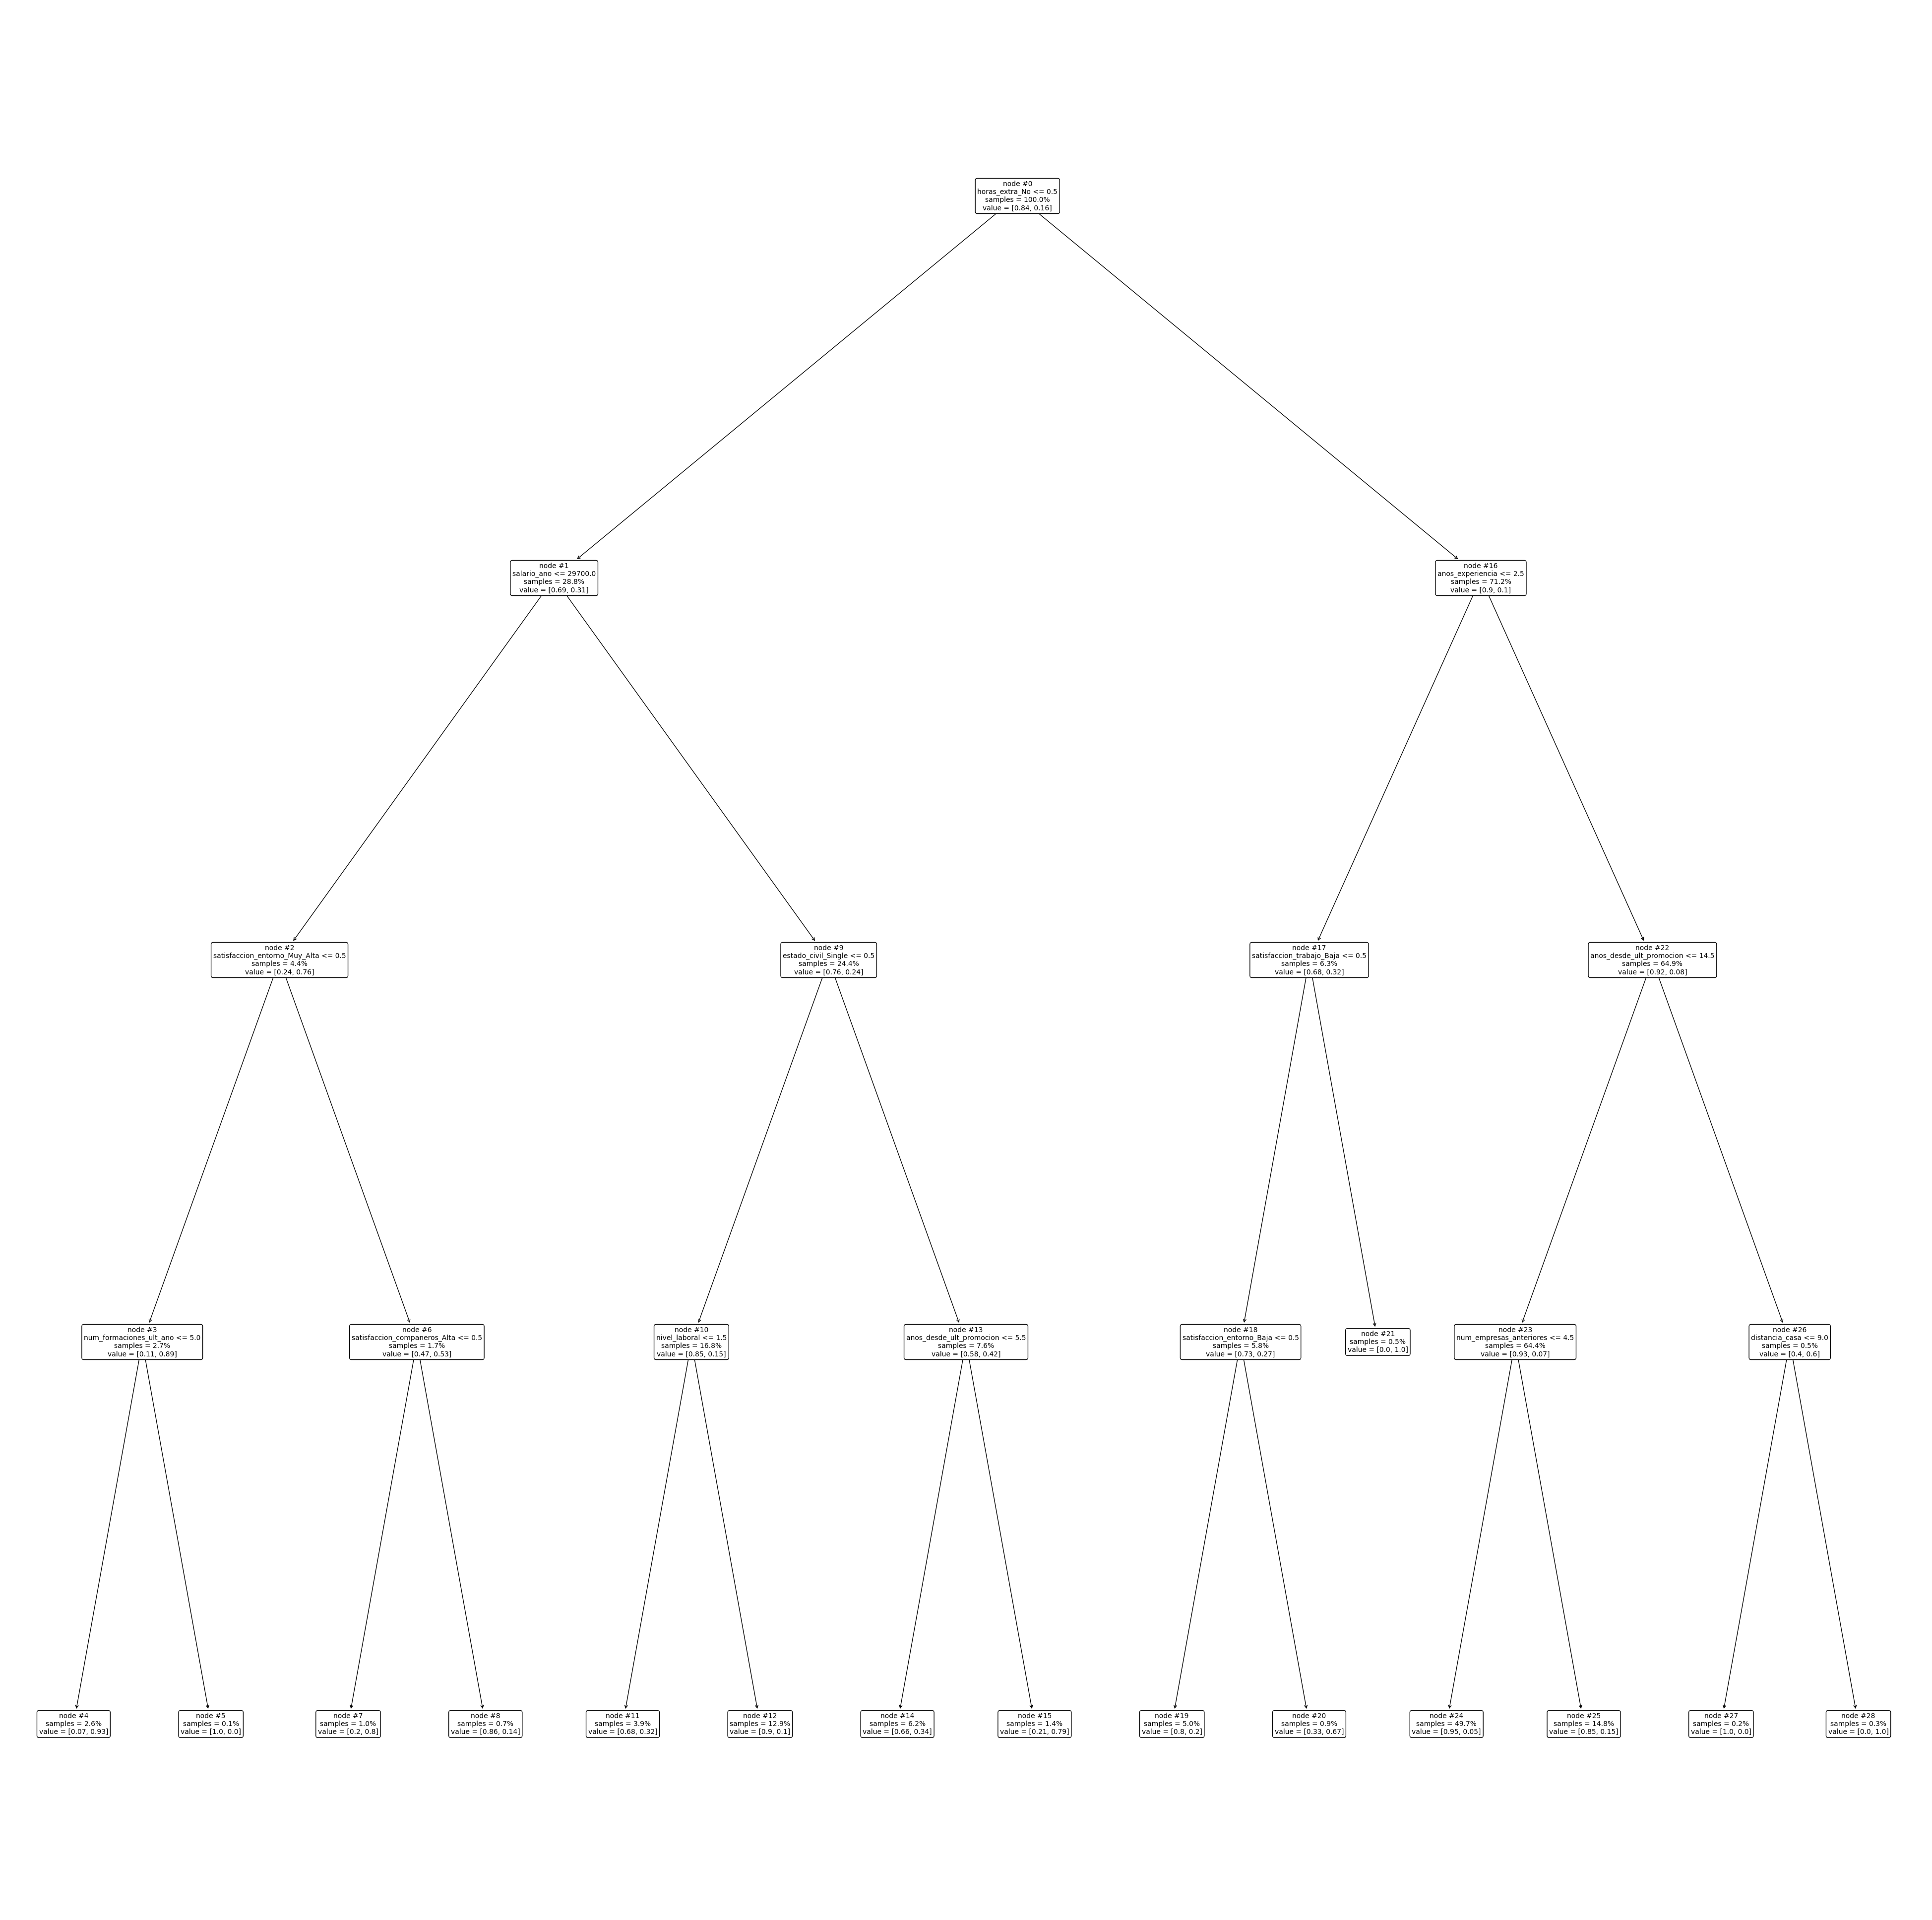

In [44]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

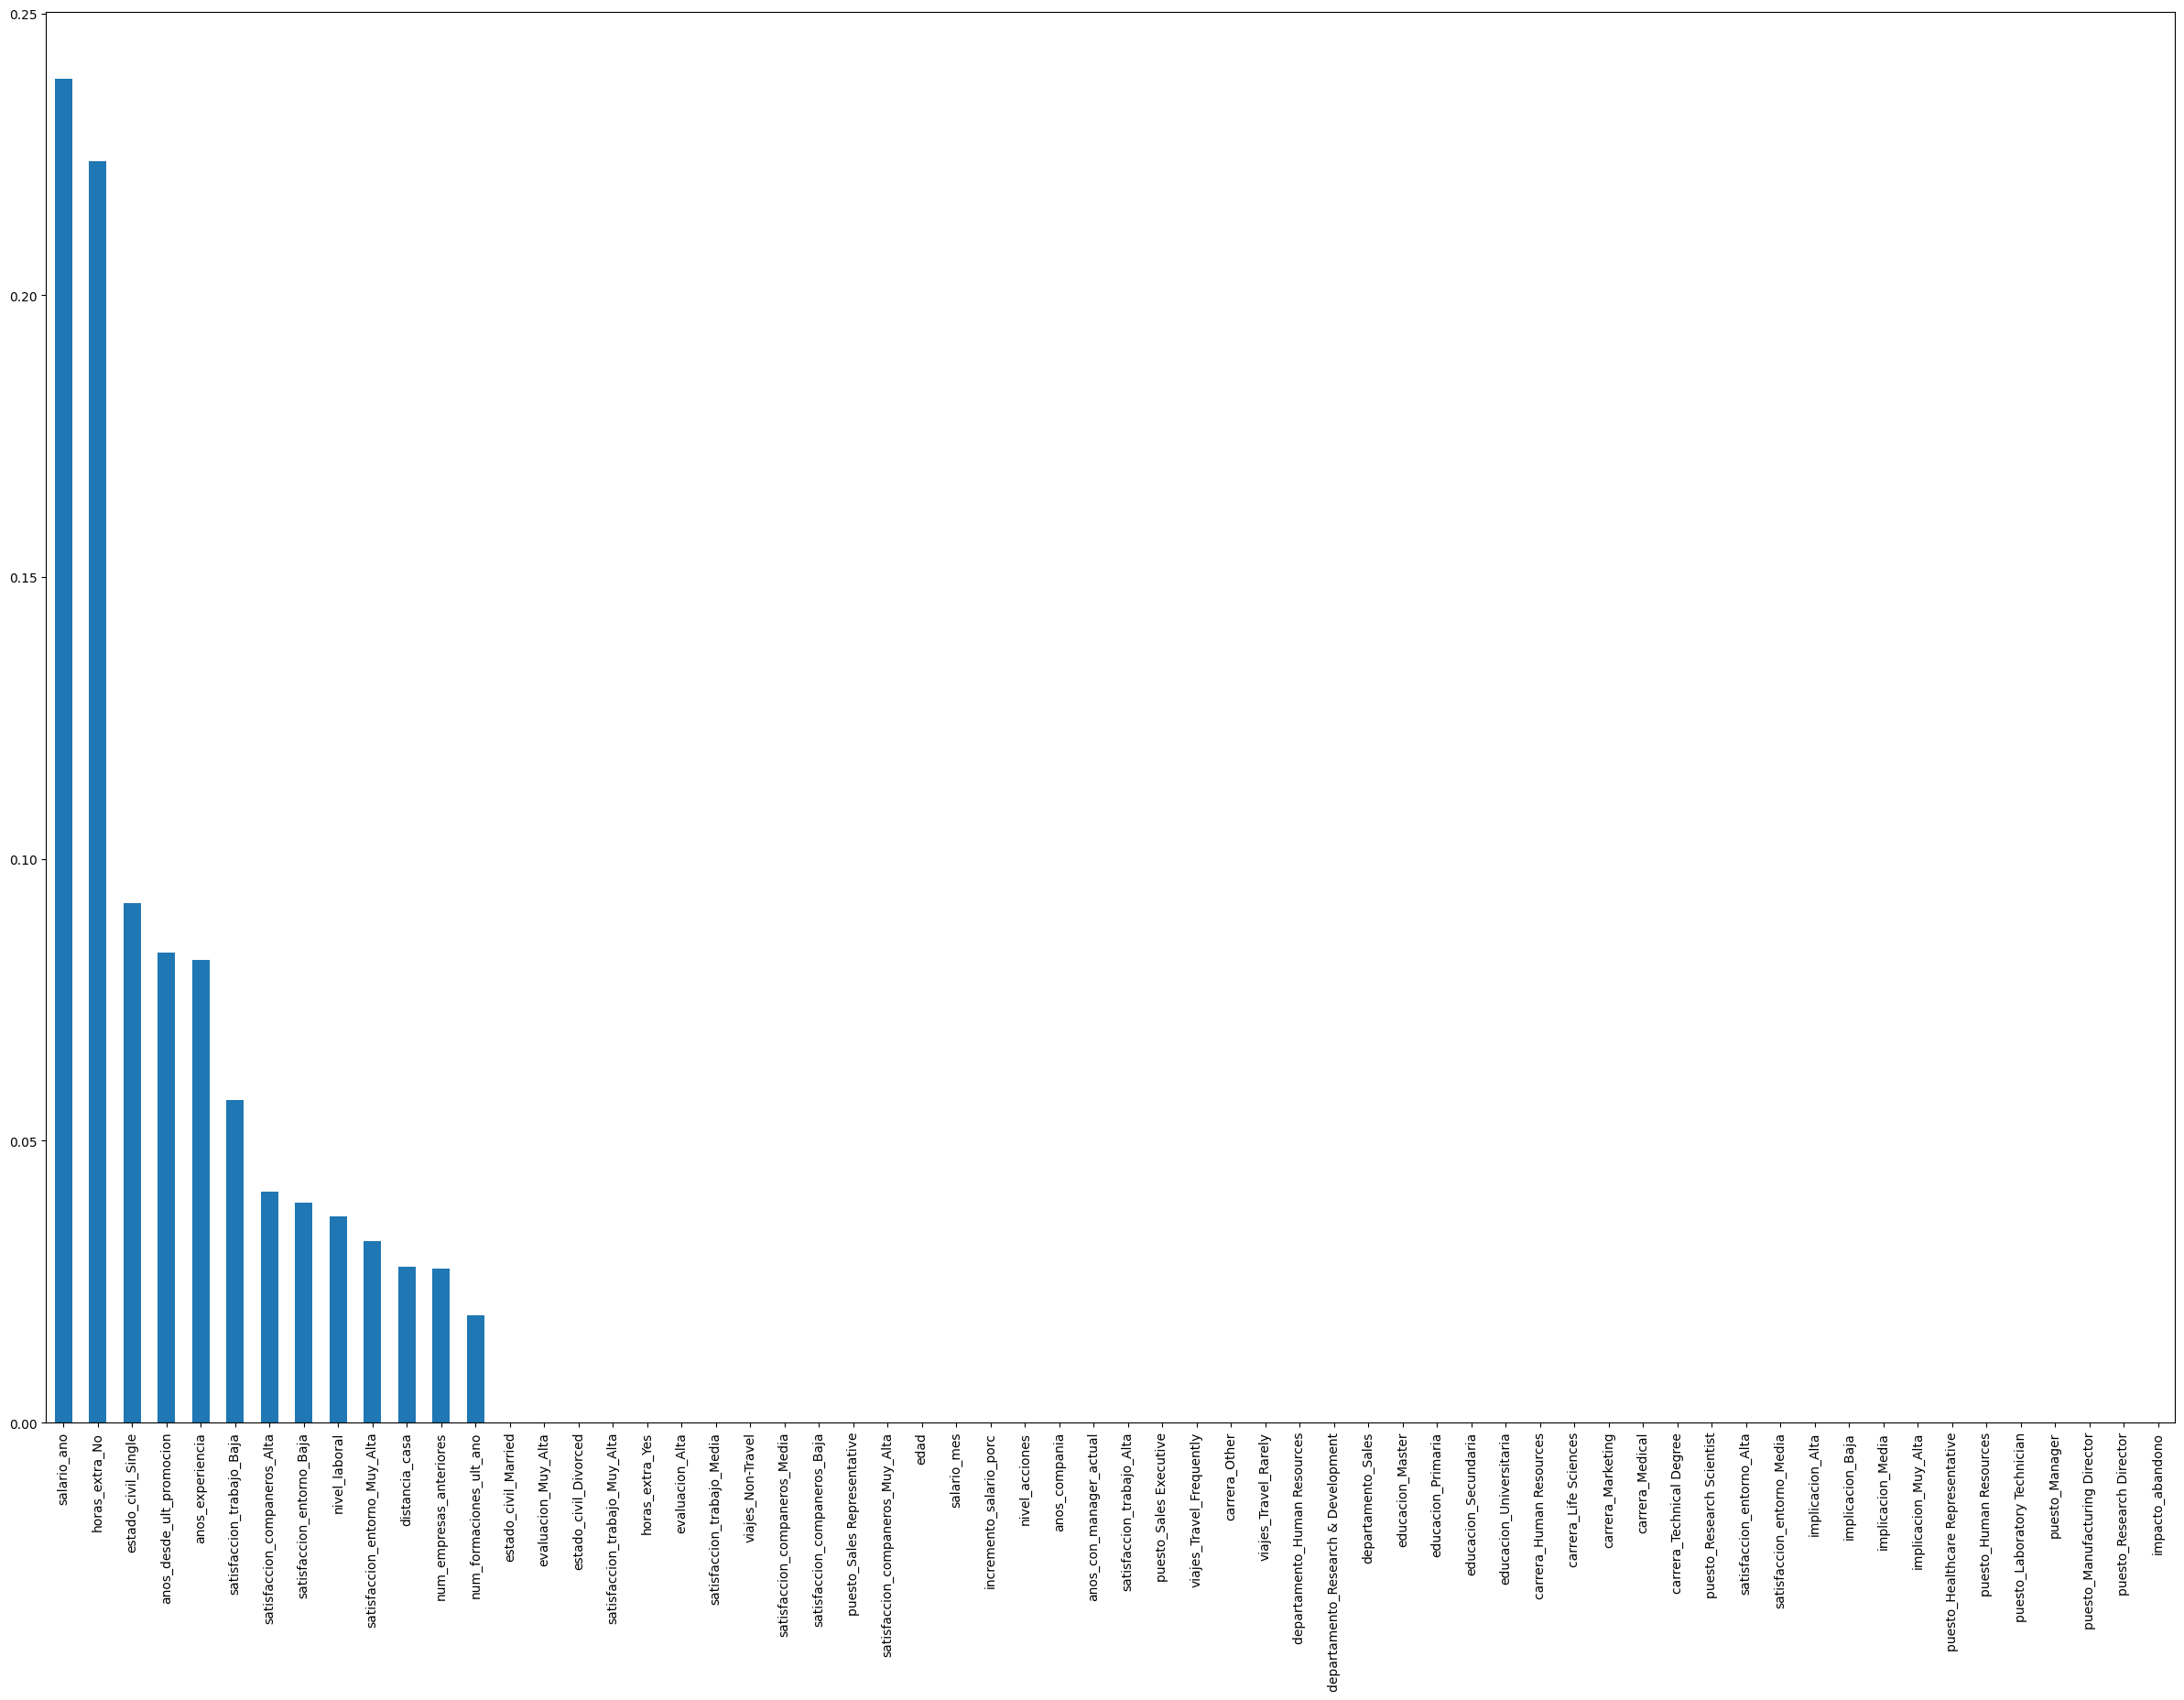

In [45]:
#feature_importances

pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

In [46]:
#Add scoring Df

df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.343750
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.050881
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.800000
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.325000
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.151316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.050881
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.050881
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.097744


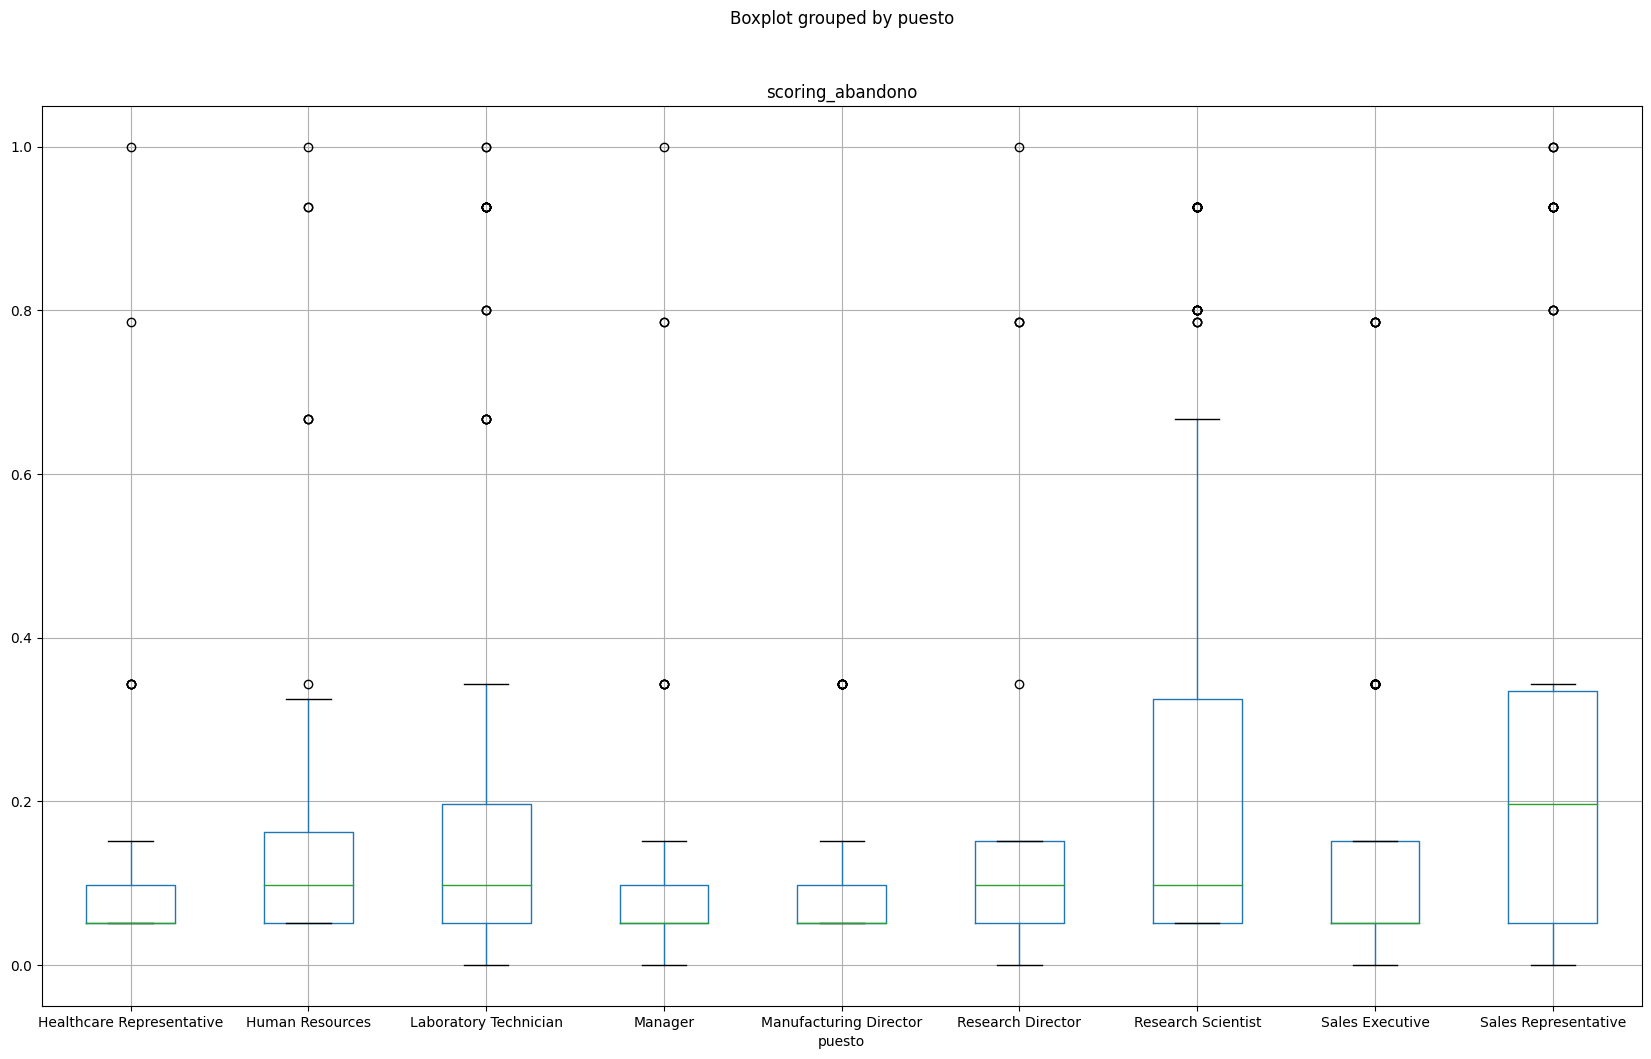

In [47]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

In [48]:
#save
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx') 
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>